<a href="https://colab.research.google.com/github/fathanick/Data-Science-Talk-Workshop-Series-2/blob/master/Scraping%2C_Preprocessing_%26_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![picture](https://drive.google.com/uc?id=1-xuFvbmPE2Y8fTaRaBblI4ghFmRfG7Bs)

In [1]:
!pip install newspaper3k

     |████████████████████████████████| 215kB 2.8MB/s 
     |████████████████████████████████| 7.4MB 50.2MB/s 
     |████████████████████████████████| 194kB 44.9MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp36-none-any.whl size=7398406 sha256=01df0ab75a61079ce0832d5530931c96a313afe64b01aba6cce02cd5687f94f0
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da20627c013f438ed34
  Created wheel for feedparser: filename=feedparser-5.2.1-cp36-none-any.whl size=44940 sha256=4aa7f6d77ce105dfedcfd048415cb730d762aa972777c5b2685f5976afbdba30
  Stored in directory: /root/.cache/pip/wheels/8c/69/b7/f52763c41c5471df57703a0ef718a32a5e81ee35dcf6d4f97f
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp36-none-any.whl size=3357 sha256=4c5c258eb1f7dd038e5e67db0b0725db5b25f8a46c32ab81631dd2502e77b41f
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c757

In [0]:
import newspaper
from newspaper import Article

In [6]:
url = "https://jogja.tribunnews.com/2019/10/08/jadwal-pertandingan-timnas-senior-dan-u-23-indonesia-yang-disiarkan-langsung-rcti"
article = Article(url)
article.download()
article.parse()
txt = article.text
txt = txt.encode('ascii', 'ignore').decode("utf-8")
print(txt)

Jadwal Timnas Senior dan U-23 Indonesia Oktober 2019

TRIBUNjogja.com --- Jeda internasional mulai berlangsung pekan ini, termasuk agenda timnas senior Indonesia maupun kategori U-23.

Timnas senior yang dipimpin oleh pelatih Simon McMenemy sudah tiba di Uni Emirat Arab (UEA) pada Kamis (3/10/2019) pekan lalu.

Evan Dimas dkk akan melakoni laga kontra timnas UEA dalam Kualifikasi Piala Dunia Grup G Zona Asia.

Laga tersebut dijadwalkan pada Kamis (10/10/2019) pukul 23.00 dan dihelat di Stadion Al Maktoum, Dubai, UEA.

Jelang laga tersebut, timnas senior dikabarkan melakukan uji coba dengan klub lokal terlebih dahulu sebagai salah satu persiapannya.

Setelah pertandingan melawan UEA, timnas akan kembali ke Indonesia dan melakoni laga kedua di kompetisi yang sama kontra Vietnam di Bali pada Selasa (15/10/2019).

Sebelumnya, jadwal timnas senior melawan Vietnam ini akan dihelat di Stadion Utama Gelora Bung Karno.

 LINK Live Streaming TVRI / Mola Tv Timnas Senior Indonesia vs UEA di Kuali

###Preprocessing The Article

In [0]:
import re, string, unicodedata

def cleaning(str):
    #remove non-ascii
    str = unicodedata.normalize('NFKD', str).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #remove URLs
    str = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', str)
    #remove punctuations
    str = re.sub(r'[^\w]|_',' ',str)
    #remove digit from string
    str = re.sub("\S*\d\S*", "", str).strip()
    #remove digit or numbers
    str = re.sub(r"\b\d+\b", " ", str)
    #to lowercase
    str = str.lower()
    #Remove additional white spaces
    str = re.sub('[\s]+', ' ', str)
    
    return str

In [0]:
clean_txt = cleaning(txt)

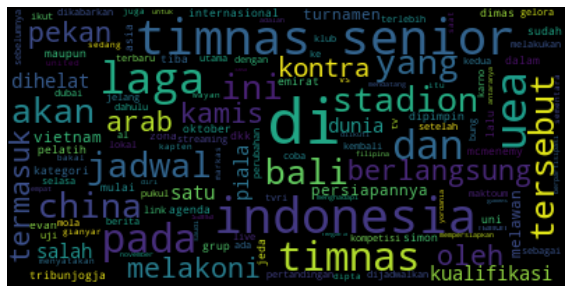

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=45).generate(clean_txt)
plt.figure(figsize=(10,8))

'''plot wordcloud in matplotlib'''

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

###Word Frequency

In [0]:
words_in_article = clean_txt.split()
words_in_article

In [22]:
import collections
import itertools

# Create counter
counts_no_urls = collections.Counter(words_in_article)

counts_no_urls.most_common(15)

[('di', 11),
 ('timnas', 10),
 ('senior', 6),
 ('indonesia', 6),
 ('uea', 5),
 ('laga', 5),
 ('dan', 4),
 ('u', 4),
 ('pada', 4),
 ('jadwal', 3),
 ('ini', 3),
 ('yang', 3),
 ('akan', 3),
 ('tersebut', 3),
 ('stadion', 3)]

In [24]:
import pandas as pd

df = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

df.head()

,words,count
0,di,11
1,timnas,10
2,senior,6
3,indonesia,6
4,uea,5


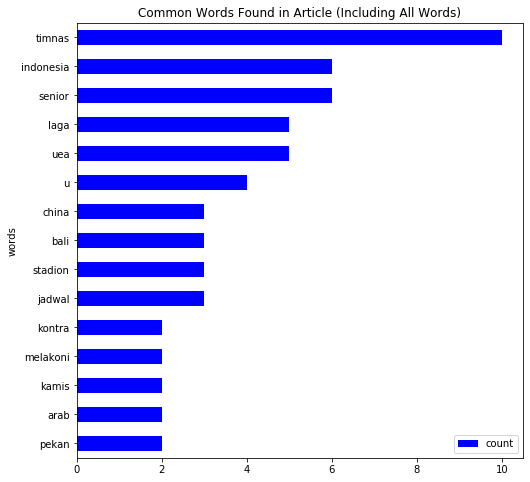

In [38]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Common Words Found in Article (Including All Words)")

plt.show()

###Word Frequency after Removing Stopwords

In [30]:
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
stop_words = set(stopwords.words('indonesian'))

# View a few words from the set
list(stop_words)[0:10]

['empat',
 'tambahnya',
 'waduh',
 'melihatnya',
 'rupanya',
 'sedikitnya',
 'akulah',
 'toh',
 'oleh',
 'beginilah']

In [0]:
new_word_list = [word for word in words_in_article if not word in stop_words]  
new_word_list

In [35]:
import collections
import itertools

# Create counter
counts_no_urls = collections.Counter(new_word_list)

counts_no_urls.most_common(15)

[('timnas', 10),
 ('senior', 6),
 ('indonesia', 6),
 ('uea', 5),
 ('laga', 5),
 ('u', 4),
 ('jadwal', 3),
 ('stadion', 3),
 ('bali', 3),
 ('china', 3),
 ('pekan', 2),
 ('arab', 2),
 ('kamis', 2),
 ('melakoni', 2),
 ('kontra', 2)]

In [36]:
import pandas as pd

df = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

df.head()

,words,count
0,timnas,10
1,senior,6
2,indonesia,6
3,uea,5
4,laga,5


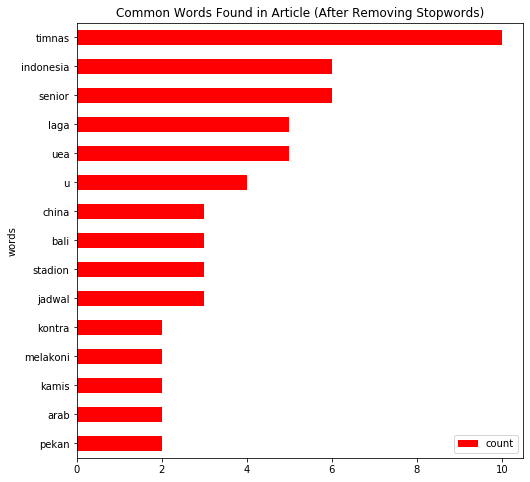

In [39]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Common Words Found in Article (After Removing Stopwords)")

plt.show()

###Scraping Multiple Pages and Save to TXT

In [0]:
urls = ["http://id.beritasatu.com/home/biayai-pembangunan-jalan-baru-tol-dan-jembatan/178885",
       "http://www.beritasatu.com/satu/506680-oktober-tol-pemalangbatang-jalani-uji-kelayakan.html",]

In [0]:
for url in urls:
    article = Article(url)
    article.download()
    article.parse()
    with open("news.txt","a+") as f:
        txt = article.text
        txt = txt.encode('ascii', 'ignore').decode("utf-8")
        f.write(txt + "\n\n")
        f.close()

###References



*   https://www.earthdatascience.org/courses/earth-analytics-python/using-apis-natural-language-processing-twitter/calculate-tweet-word-frequencies-in-python/

